In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import sys
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Reading data : DOF: Condominium comparable rental income – Manhattan - FY 2010/2011

In [2]:

!curl -O https://data.cityofnewyork.us/resource/gmv6-gf4i.csv

os.system(" mv gmv6-gf4i.csv " + os.getenv("PUIDATA"))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  520k    0  520k    0     0   520k      0 --:--:-- --:--:-- --:--:-- 1635k


0

In [3]:
df_dof = pd.read_csv(os.getenv("PUIDATA")+ '/'+ 'gmv6-gf4i.csv' )

In [4]:
df_dof.describe()


,bbl,bin,borough,census_tract,community_board,comparable_rental_1_dist_from_coop_in_miles,comparable_rental_1_est_gross_income,comparable_rental_1_full_market_value,comparable_rental_1_gross_income_per_sqft,comparable_rental_1_gross_sqft,...,latitude,longitude,manhattan_condominium_property_est_gross_income,manhattan_condominium_property_full_market_value,manhattan_condominium_property_gross_income_per_sqft,manhattan_condominium_property_gross_sqft,manhattan_condominium_property_market_value_per_sqft,manhattan_condominium_property_total_units,manhattan_condominium_property_year_built,postcode
count,9.890000e+02,9.890000e+02,1000.0,997.000000,997.000000,1000.000000,1.000000e+03,1.000000e+03,1000.00000,1000.000000,...,997.000000,997.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,997.000000
mean,1.008940e+09,1.048132e+06,1.0,1787.864594,4.889669,0.380930,5.645362e+06,2.688625e+07,39.69781,135666.215000,...,40.749733,-73.983910,4.761046e+06,2.268277e+07,36.536280,1.234274e+05,172.522900,100.346000,1953.581000,10027.549649
std,4.582405e+06,3.127085e+04,0.0,5283.009525,3.139952,0.297906,6.438526e+06,3.123696e+07,9.06633,148810.587904,...,0.024388,0.017968,5.983677e+06,2.884059e+07,7.067202,1.459618e+05,40.294511,129.405286,38.902736,39.361658
min,1.000078e+09,1.000000e+06,1.0,6.000000,1.000000,0.000000,2.240440e+05,5.770000e+05,17.12000,6190.000000,...,40.703037,-74.018002,0.000000e+00,6.229940e+05,0.000000,3.812000e+03,49.900000,11.000000,1836.000000,10000.000000
25%,1.005298e+09,1.016177e+06,1.0,61.000000,2.000000,0.150000,1.148000e+06,5.540000e+06,32.57500,32500.000000,...,40.729025,-73.998722,1.134580e+06,5.174998e+06,31.000000,3.416800e+04,145.000000,23.750000,1915.750000,10011.000000
50%,1.008928e+09,1.044853e+06,1.0,100.000000,5.000000,0.300000,3.046834e+06,1.480000e+07,39.10000,76549.000000,...,40.748041,-73.984713,2.616681e+06,1.225000e+07,36.500000,7.246650e+04,170.000000,52.000000,1957.500000,10017.000000
75%,1.013198e+09,1.079134e+06,1.0,157.000000,7.000000,0.500000,7.477294e+06,3.580000e+07,46.60000,182767.000000,...,40.770760,-73.970339,5.691675e+06,2.739999e+07,42.000000,1.545758e+05,206.000000,128.000000,1988.000000,10024.000000
max,1.017538e+09,1.089507e+06,1.0,31704.000000,64.000000,1.950000,3.465949e+07,1.610000e+08,74.00000,968264.000000,...,40.808426,-73.938370,5.538000e+07,2.580000e+08,63.000000,1.496819e+06,308.000000,1258.000000,2008.000000,10280.000000


In [5]:
# Since the dataset is from 2010/2011, I am using 2011 to calculate property age
df_dof['manhattan_condominium_property_age'] = 2011-df_dof.manhattan_condominium_property_year_built

In [6]:
df_dof.head()

,_comparable_rental_1_boro_block_lot,bbl,bin,borough,census_tract,community_board,comparable_rental_1_address,comparable_rental_1_building_classification,comparable_rental_1_dist_from_coop_in_miles,comparable_rental_1_est_gross_income,...,manhattan_condominium_property_full_market_value,manhattan_condominium_property_gross_income_per_sqft,manhattan_condominium_property_gross_sqft,manhattan_condominium_property_market_value_per_sqft,manhattan_condominium_property_neighborhood,manhattan_condominium_property_total_units,manhattan_condominium_property_year_built,nta,postcode,manhattan_condominium_property_age
0,1-00065-0006,1.000078e+09,1077806.0,1,9.0,1.0,21 MAIDEN LANE,D6-ELEVATOR,0.45,1340000,...,5950000,35.0,36500,163.0,FINANCIAL,42,1920,Battery Park City-Lower Manhattan ...,10004.0,91
1,1-00140-0005,1.000088e+09,1087700.0,1,9.0,1.0,147 CHAMBERS STREET,D9-ELEVATOR,0.90,5126000,...,27900000,45.0,126420,221.0,FINANCIAL,78,1985,Battery Park City-Lower Manhattan ...,10004.0,26
2,1-00042-0001,1.000158e+09,1087243.0,1,13.0,1.0,100 MAIDEN LANE,D6-ELEVATOR,0.45,12283000,...,50100001,41.0,249076,201.0,FINANCIAL,282,1930,Battery Park City-Lower Manhattan ...,10004.0,81
3,1-00016-0015,1.000168e+09,1000061.0,1,31704.0,1.0,50 BATTERY PLACE,D8-ELEVATOR,0.00,6736000,...,43100005,40.0,219495,196.0,TRIBECA,239,1985,Battery Park City-Lower Manhattan ...,10280.0,26
4,1-00016-0015,1.000168e+09,1000301.0,1,31704.0,1.0,50 BATTERY PLACE,D8-ELEVATOR,0.00,6736000,...,27399999,40.0,139719,196.0,TRIBECA,133,1986,Battery Park City-Lower Manhattan ...,10280.0,25


In [7]:
# extract only the columns of interest
df_cut = df_dof[['manhattan_condominium_property_age', 'manhattan_condominium_property_full_market_value']]

In [8]:
df_cut.head()

,manhattan_condominium_property_age,manhattan_condominium_property_full_market_value
0,91,5950000
1,26,27900000
2,81,50100001
3,26,43100005
4,25,27399999


In [9]:
# divide the market value to 1e6, so that we will obtain the market value 
#in terms of million dollars
df_cut['market_value_million'] = df_cut.manhattan_condominium_property_full_market_value /1e6 

/Users/gokmendedemen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df_cut.head()

,manhattan_condominium_property_age,manhattan_condominium_property_full_market_value,market_value_million
0,91,5950000,5.950000
1,26,27900000,27.900000
2,81,50100001,50.100001
3,26,43100005,43.100005
4,25,27399999,27.399999


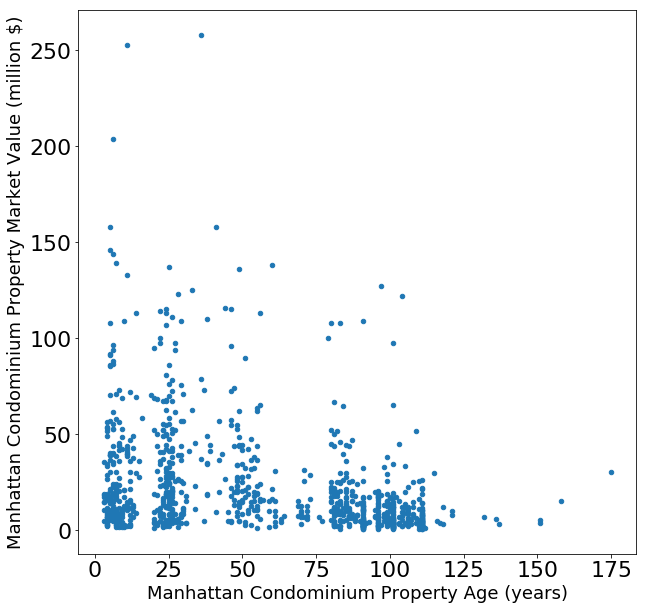

In [11]:

ax = df_cut.plot(kind='scatter',x='manhattan_condominium_property_age',y='market_value_million',
                     marker='o', figsize=(10, 10),  
                     fontsize=22)
xl = ax.set_xlabel("Manhattan Condominium Property Age (years)", fontsize=18)
yl = ax.set_ylabel("Manhattan Condominium Property Market Value (million $)", fontsize=18)


**Figure 1:** The relationship between Condominium Property Market Value and Property Age in Manhattan